
---

# **🔤  03 b - Model Testing: Modern Embedding Approaches**

## **📑 Table of Contents**
1.  [🎯 Objectives](#-objectives)
2.  [⚙️ Setup & Imports](#-setup--imports)
3.  [📥 Load Cleaned Data](#-load-cleaned-data)
4.  [🔤 Sentence Transformer Embeddings](#-sentence-transformer-embeddings)
5.  [🤖 Model Training](#-model-training)
6.  [📊 Comprehensive Model Evaluation](#-comprehensive-model-evaluation)
7.  [📈 Advanced Visualizations](#-advanced-visualizations)
8.  [🏆 Best Model Selection](#-best-model-selection)
9.  [💾 Save Results](#-save-results)

---

## **🎯 Objectives**
- Test modern sentence embedding techniques
- Compare multiple classification models
- Perform comprehensive evaluation with multiple metrics
- Select and save the best performing model


---

## **⚙️ 1. Setup & Imports**


In [1]:
# Add project root to path
import sys
import os
sys.path.append(os.path.abspath('..'))

# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings("ignore")

# Model training
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Enhanced evaluation metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                            roc_auc_score, roc_curve, confusion_matrix, classification_report,
                            precision_recall_curve, auc)
from sklearn.calibration import calibration_curve

# Sentence Transformers (modern embedding approach)
from sentence_transformers import SentenceTransformer

# Model persistence
import joblib

print("✅ All libraries imported successfully!")

### **🔧 Import Enhanced Functions from modeling_utils.py**

from src.modeling_utils import (
    engineer_time_features, combine_text_features, 
    evaluate_model_comprehensive, plot_experiment_results, plot_model_comparison, plot_feature_analysis
)

# Unified experiment tracker
from src.experiment_tracker import log_experiment, create_experiment_id


%matplotlib inline
plt.style.use('default')

✅ All libraries imported successfully!


---

## **📥 2. Load Cleaned Data & Experimental Setup**


In [2]:
print("📁 Loading cleaned datasets...")

# Load different cleaning strategies
df_basic = pd.read_csv('../dataset/01_interim/cleaned_data_basic.csv')
df_aggressive = pd.read_csv('../dataset/01_interim/cleaned_data_aggressive.csv')

val_basic = pd.read_csv('../dataset/01_interim/cleaned_validation_basic.csv')
val_aggressive = pd.read_csv('../dataset/01_interim/cleaned_validation_aggressive.csv')

print(f"✅ Datasets loaded:")
print(f"   - Basic cleaning: {df_basic.shape}")
print(f"   - Aggressive cleaning: {df_aggressive.shape}")

# Check available columns
print(f"\n�� Available columns: {df_basic.columns.tolist()}")


📁 Loading cleaned datasets...
✅ Datasets loaded:
   - Basic cleaning: (39942, 13)
   - Aggressive cleaning: (39942, 13)

�� Available columns: ['label', 'title', 'text', 'subject', 'clean_title', 'clean_text', 'title_length', 'title_word_count', 'text_length', 'text_word_count', 'year', 'quarter', 'is_weekend']



---

## **🧪 3. Experiment Design Framework**


### **Engineer Time Features** v1, 2 & 3



In [ ]:
# # Add after loading datasets:
# print("🕒 Engineering time-based features...")
# df_basic = engineer_time_features(df_basic)
# df_aggressive = engineer_time_features(df_aggressive)

# print(f"\n📊 Updated dataset shapes:")
# print(f"   - Basic cleaning: {df_basic.shape}")
# print(f"   - Aggressive cleaning: {df_aggressive.shape}")

🕒 Engineering time-based features...
🕒 Engineering time-based features...
   ✅ Added time features: is_recent, is_medium_age, is_old
🕒 Engineering time-based features...
   ✅ Added time features: is_recent, is_medium_age, is_old

📊 Updated dataset shapes:
   - Basic cleaning: (39942, 13)
   - Aggressive cleaning: (39942, 13)


### **Experiment Matrix**

We'll systematically test combinations of:
1. **Feature Types**: title only, text only, title+text combined, time features
2. **Cleaning Strategies**: basic (preserves context) vs aggressive (removes noise)  
3. **Models**: Logistic Regression, Random Forest, SVM
4. **Embeddings**: Sentence Transformers (all-MiniLM-L6-v2)

### 1. **Experiment Matrix v1 - many Experimental Configurations**

1. Batch of experiments:

(CURSOR V. - No Subject, Added Time Features)


In [ ]:
## 1st Batch of experiments:

# # Define experimental configurations
# experimental_configs = [
#     # Feature combinations with BASIC cleaning
#     {'name': 'Title_Basic', 'data': df_basic, 'features': ['clean_title'], 'cleaning': 'basic'},
#     {'name': 'Text_Basic', 'data': df_basic, 'features': ['clean_text'], 'cleaning': 'basic'},
#     {'name': 'Title+Text_Basic', 'data': df_basic, 'features': ['clean_title', 'clean_text'], 'cleaning': 'basic'},
#     {'name': 'Title+Time_Basic', 'data': df_basic, 'features': ['clean_title', 'is_recent', 'is_medium_age', 'is_old'], 'cleaning': 'basic'},
#     {'name': 'Title+Text+Time_Basic', 'data': df_basic, 'features': ['clean_title', 'clean_text', 'is_recent', 'is_medium_age', 'is_old'], 'cleaning': 'basic'},
    
#     # Feature combinations with AGGRESSIVE cleaning
#     {'name': 'Title_Aggressive', 'data': df_aggressive, 'features': ['clean_title'], 'cleaning': 'aggressive'},
#     {'name': 'Text_Aggressive', 'data': df_aggressive, 'features': ['clean_text'], 'cleaning': 'aggressive'},
#     {'name': 'Title+Text_Aggressive', 'data': df_aggressive, 'features': ['clean_title', 'clean_text'], 'cleaning': 'aggressive'},
#     {'name': 'Title+Time_Aggressive', 'data': df_aggressive, 'features': ['clean_title', 'is_recent', 'is_medium_age', 'is_old'], 'cleaning': 'aggressive'},
#     {'name': 'Title+Text+Time_Aggressive', 'data': df_aggressive, 'features': ['clean_title', 'clean_text', 'is_recent', 'is_medium_age', 'is_old'], 'cleaning': 'aggressive'},
# ]



### 2. **Experiment Matrix v2.1 - Focused Subset**
2. Batch, less amount of experiments


In [ ]:
# # We'll test only these specific configurations:
# focused_configs = [
#     # Text with Aggressive cleaning
#     {'name': 'Text_Aggressive', 'data': df_aggressive, 'features': ['clean_text'], 'cleaning': 'aggressive'},
#     # Text with Basic cleaning  
#     {'name': 'Text_Basic', 'data': df_basic, 'features': ['clean_text'], 'cleaning': 'basic'},
#     # Title+Text+Time with Basic cleaning
#     {'name': 'Title+Text+Time_Basic', 'data': df_basic, 'features': ['clean_title', 'clean_text', 'is_recent', 'is_medium_age', 'is_old'], 'cleaning': 'basic'},
# ]

### 3. **Experiment Matrix v3.1 - Focused Subset**
1. 3rd Batch, less amount of experiments
2. wining settings with 2 other models


In [ ]:
# ### **Experiment Matrix - Focused on Winning Combination**
# # Only test the winning configuration with additional models
# focused_configs = [
#     {'name': 'Text_Aggressive', 'data': df_aggressive, 'features': ['clean_text'], 'cleaning': 'aggressive'}
# ]

### 4. **🧪 Experiment Matrix v4.1 - Focused Subset**

**Objective:** 4th Batch with optimized, focused experiments testing the winning configuration with new feature combinations on SVC model only.

**Strategy:**
- Build upon previous winning configuration: `Text_Aggressive` 
- Test systematic addition of new engineered features
- Use only SVC model (best performer from previous batches)
- Minimal, targeted experiments for maximum insight

**Hypothesis:** The new engineered features (text lengths + time features) will improve upon the baseline text-only performance.

In [3]:
### **🧪 Experiment Matrix v3.1 - Focused Feature Testing**
print("🧪 Configuring Experiment Matrix v3.1 - Focused Feature Testing")

# Winning base configuration
base_config = {
    'name': 'Text_Aggressive', 
    'data': df_aggressive,
    'features': ['clean_text'],  # Winning feature
    'cleaning': 'aggressive'     # Winning preprocessing
}

# New feature combinations to test
feature_combinations = [
    # Baseline: text only (replicate winning result)
    {'name': 'Text_only', 'features': ['clean_text'], 'description': 'Baseline - text only'},
    
    # Text + Text length features
    {'name': 'Text+Lengths', 'features': ['clean_text', 'title_length', 'title_word_count', 'text_length', 'text_word_count'], 
     'description': 'Text + length features'},
    
    # Text + Time features  
    {'name': 'Text+Time', 'features': ['clean_text', 'year', 'quarter', 'is_weekend'],
     'description': 'Text + time features'},
    
    # Text + All engineered features
    {'name': 'Text+All', 'features': ['clean_text', 'title_length', 'title_word_count', 'text_length', 'text_word_count', 'year', 'quarter', 'is_weekend'],
     'description': 'Text + all engineered features'},
    
    # All engineered features only (no text)
    {'name': 'Engineered_only', 'features': ['title_length', 'title_word_count', 'text_length', 'text_word_count', 'year', 'quarter', 'is_weekend'],
     'description': 'Engineered features only (no text)'}
]

# Create experimental configs
experimental_configs = []
for combo in feature_combinations:
    config = base_config.copy()
    config['name'] = combo['name']
    config['features'] = combo['features']
    config['description'] = combo['description']
    experimental_configs.append(config)

print("✅ Experiment Matrix configured:")
print(f"   Total experiments: {len(experimental_configs)}")
print(f"   Feature combinations tested:")
for i, config in enumerate(experimental_configs, 1):
    print(f"   {i}. {config['name']}: {config['description']}")

🧪 Configuring Experiment Matrix v3.1 - Focused Feature Testing
✅ Experiment Matrix configured:
   Total experiments: 5
   Feature combinations tested:
   1. Text_only: Baseline - text only
   2. Text+Lengths: Text + length features
   3. Text+Time: Text + time features
   4. Text+All: Text + all engineered features
   5. Engineered_only: Engineered features only (no text)


## Models to test


### 1. Enhanced Experimental v1.0

In [ ]:
# # Models to test v1.0 CURSOR V.

# models_to_test = {
#     'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
#     'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
#     'SVM': SVC(kernel='linear', probability=True, random_state=42)
# }

# print(f"🔬 Enhanced Experimental Design:")
# print(f"   - {len(experimental_configs)} feature combinations")
# print(f"   - {len(models_to_test)} models")
# print(f"   - Total experiments: {len(experimental_configs) * len(models_to_test)}")
# print(f"   - NEW: Time-based features included")
# print(f"   - REMOVED: Subject feature (as requested)")

# # Initialize results storage
# all_results = []
# embeddings_cache = {}  # Cache embeddings to avoid recomputation

# print("✅ Enhanced experimental framework initialized!")

🔬 Enhanced Experimental Design:
   - 10 feature combinations
   - 3 models
   - Total experiments: 30
   - NEW: Time-based features included
   - REMOVED: Subject feature (as requested)
✅ Enhanced experimental framework initialized!


### 2. Focused models V2.1 & v 4.1
- Only SVM but with 3 configuration possibilities.

In [ ]:
# # Use only SVM model
# focused_models = {
#     'SVM': SVC(kernel='linear', probability=True, random_state=42)
# }

# # Replace the original variables
# experimental_configs = focused_configs
# models_to_test = focused_models

# print("🎯 Running focused experiment set:")
# print(f"   Configurations: {len(experimental_configs)}")
# print(f"   Models: {list(models_to_test.keys())}")

🎯 Running focused experiment set:
   Configurations: 3
   Models: ['SVM']


### 3. Focused models V3.1
1. 3rd Batch, less amount of experiments
2. wining settings with 2 other models

In [5]:
# Add these imports at the top of your notebook with other imports
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Then in your model definition section, add the new models:
print("🤖 Adding XGBoost and LightGBM models...")


🤖 Adding XGBoost and LightGBM models...


In [10]:
# Add to your existing models_to_test dictionary
focused_models = {
    'XGBoost': XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    ),
    'LightGBM': LGBMClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        random_state=42,
        verbosity=-1  # Reduces output noise
    )
}

# Replace the original variables
experimental_configs = focused_configs
models_to_test = focused_models

print("🎯 Running focused experiment set v3.1:")
print(f"✅ Total models to test: {len(models_to_test)}")
print(f"   Models: {list(models_to_test.keys())}")
print(f"   Configuration: {experimental_configs[0]['name']}")
print(f"   Total experiments: {len(experimental_configs) * len(models_to_test)}")

🎯 Running focused experiment set v3.1:
✅ Total models to test: 2
   Models: ['XGBoost', 'LightGBM']
   Configuration: Text_Aggressive
   Total experiments: 2


### 4. Focused models 4.1 SVC Only

In [4]:
## 🤖 Models to Test - SVC Only
print("🤖 Configuring models to test - SVC only")

# Only test SVC model (best performer from previous batches)
models_to_test = {
    'SVC': SVC(kernel='linear', probability=True, random_state=42)
}

print("✅ Models configured:")
print(f"   Single model: SVC")
print(f"   Total experiment runs: {len(experimental_configs)} configurations × 1 model = {len(experimental_configs)} total runs")

print("\n🎯 Experiment Goals:")
print("   1. Establish baseline with text-only (replicate previous win)")
print("   2. Test incremental value of length features")  
print("   3. Test incremental value of time features")
print("   4. Test combined value of all features")
print("   5. Test engineered features without text (ablation)")

🤖 Configuring models to test - SVC only
✅ Models configured:
   Single model: SVC
   Total experiment runs: 5 configurations × 1 model = 5 total runs

🎯 Experiment Goals:
   1. Establish baseline with text-only (replicate previous win)
   2. Test incremental value of length features
   3. Test incremental value of time features
   4. Test combined value of all features
   5. Test engineered features without text (ablation)



---

## **🧪 3. Experimental Design Framework**


In [5]:

### **Helper Functions**

def combine_text_features(data, feature_columns):
    """Combine multiple text columns into a single string for embedding"""
    if len(feature_columns) == 1:
        # Single feature
        return data[feature_columns[0]].fillna('').astype(str)
    else:
        # Multiple features - combine them
        combined = data[feature_columns].fillna('').astype(str)
        return combined.apply(lambda x: ' | '.join(x), axis=1)

def evaluate_model_comprehensive(model, X_test, y_test, model_name, config_name):
    """Comprehensive model evaluation with multiple metrics"""
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    results = {
        'experiment': config_name,
        'model': model_name,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba)
    }
    return results


---

## **🔤 4. Sentence Transformer Embeddings & Model Training**

### **Load Sentence Transformer Model**

In [6]:
print("🔤 Loading Sentence Transformer model...")
# 'all-MiniLM-L6-v2' - good balance between speed and quality
# Other options: 'all-mpnet-base-v2' (better quality), 'paraphrase-MiniLM-L3-v2' (faster)

# Using a balanced model for speed and quality
sentence_model = SentenceTransformer('all-MiniLM-L6-v2')

print("✅ Model loaded successfully!")
print(f"📐 Model embedding dimension: {sentence_model.get_sentence_embedding_dimension()}")


🔤 Loading Sentence Transformer model...
✅ Model loaded successfully!
📐 Model embedding dimension: 384


### **Run All Experiments**

In [7]:
## DSeek new Version wedns.

### **Run All Experiments**
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
print(f"🚀 Starting experimental runs at {timestamp}")
print("=" * 70)

# Initialize results storage
all_results = []
embeddings_cache = {}  # Cache embeddings to avoid recomputation

for i, config in enumerate(experimental_configs, 1):
    config_name = config['name']
    data = config['data']
    features = config['features']
    cleaning_strategy = config['cleaning']
    
    print(f"\n🧪 EXPERIMENT {i}/{len(experimental_configs)}: {config_name}")
    print(f"   Features: {features}")
    print(f"   Cleaning: {cleaning_strategy}")
    
    # Prepare text data
    print("   📝 Preparing text data...")
    X_text = combine_text_features(data, features)
    y = data['label']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_text, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Create embeddings (with caching)
    cache_key = f"{config_name}_{len(X_train)}"
    if cache_key not in embeddings_cache:
        print("   🔄 Creating embeddings...")
        X_train_embeddings = sentence_model.encode(X_train.tolist(), show_progress_bar=False)
        X_test_embeddings = sentence_model.encode(X_test.tolist(), show_progress_bar=False)
        embeddings_cache[cache_key] = (X_train_embeddings, X_test_embeddings)
    else:
        print("   📋 Using cached embeddings...")
        X_train_embeddings, X_test_embeddings = embeddings_cache[cache_key]
    
    print(f"   📊 Embeddings shape: {X_train_embeddings.shape}")
    
    # Test all models
    for model_name, model in models_to_test.items():
        print(f"   🤖 Training {model_name}...")
        
        # Train model
        model.fit(X_train_embeddings, y_train)
        
        # Evaluate
        results = evaluate_model_comprehensive(
            model, X_test_embeddings, y_test, model_name, config_name
        )
        
        # Log to unified experiment tracker
        experiment_data = {
            'experiment_type': 'sentence_transformers',
            'model_name': model_name,
            'preprocessing': cleaning_strategy,
            'accuracy': results['accuracy'],
            'precision': results['precision'],
            'recall': results['recall'],
            'f1_score': results['f1'],
            'roc_auc': results['roc_auc'],
            'dataset': 'fake_news',
            'notes': f"Features: {features}"
        }
        
        # Use the unified logging system
        experiment_id = log_experiment(experiment_data)
        results['experiment_id'] = experiment_id  # Store for reference
        all_results.append(results)
        
        print(f"      ✅ Accuracy: {results['accuracy']:.4f} | F1: {results['f1']:.4f} | ROC-AUC: {results['roc_auc']:.4f}")

print("\n" + "=" * 70)
print("🎉 All experiments completed!")

🚀 Starting experimental runs at 20250903_190142

🧪 EXPERIMENT 1/5: Text_only
   Features: ['clean_text']
   Cleaning: aggressive
   📝 Preparing text data...
   🔄 Creating embeddings...
   📊 Embeddings shape: (31953, 384)
   🤖 Training SVC...
✅ Experiment logged: se_s_20250903_191402
      ✅ Accuracy: 0.9553 | F1: 0.9557 | ROC-AUC: 0.9907

🧪 EXPERIMENT 2/5: Text+Lengths
   Features: ['clean_text', 'title_length', 'title_word_count', 'text_length', 'text_word_count']
   Cleaning: aggressive
   📝 Preparing text data...
   🔄 Creating embeddings...
   📊 Embeddings shape: (31953, 384)
   🤖 Training SVC...
✅ Experiment logged: se_s_20250903_195414
      ✅ Accuracy: 0.9541 | F1: 0.9545 | ROC-AUC: 0.9902

🧪 EXPERIMENT 3/5: Text+Time
   Features: ['clean_text', 'year', 'quarter', 'is_weekend']
   Cleaning: aggressive
   📝 Preparing text data...
   🔄 Creating embeddings...
   📊 Embeddings shape: (31953, 384)
   🤖 Training SVC...
✅ Experiment logged: se_s_20250903_202343
      ✅ Accuracy: 0.9548 |

### 2. Optional: Add Debug Output for Tracking Verification

In [8]:
# After logging the experiment, add this:
experiment_data = {
    'experiment_type': 'sentence_transformers',
    'model_name': model_name,
    'preprocessing': cleaning_strategy,
    'accuracy': results['accuracy'],
    'precision': results['precision'],
    'recall': results['recall'],
    'f1_score': results['f1'],
    'roc_auc': results['roc_auc'],
    'dataset': 'fake_news',
    'notes': f"Features: {features}"
}

# Use the unified logging system
experiment_id = log_experiment(experiment_data)
results['experiment_id'] = experiment_id  # Store for reference
all_results.append(results)

# ADD THIS DEBUG OUTPUT:
print(f"      📝 Logged experiment: {experiment_id}")
print(f"      📊 Metrics: Accuracy={results['accuracy']:.4f}, F1={results['f1']:.4f}")

print(f"      ✅ Accuracy: {results['accuracy']:.4f} | F1: {results['f1']:.4f} | ROC-AUC: {results['roc_auc']:.4f}")

✅ Experiment logged: se_s_20250903_210300
      📝 Logged experiment: se_s_20250903_210300
      📊 Metrics: Accuracy=0.8875, F1=0.8902
      ✅ Accuracy: 0.8875 | F1: 0.8902 | ROC-AUC: 0.9536


In [ ]:
# ## CURSOR Version tuesday

# timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
# print(f"🚀 Starting experimental runs at {timestamp}")
# print("=" * 70)

# for i, config in enumerate(experimental_configs, 1):
#     config_name = config['name']
#     data = config['data']
#     features = config['features']
#     cleaning_strategy = config['cleaning']
    
#     print(f"\n🧪 EXPERIMENT {i}/{len(experimental_configs)}: {config_name}")
#     print(f"   Features: {features}")
#     print(f"   Cleaning: {cleaning_strategy}")
    
#     # Prepare text data
#     print("   📝 Preparing text data...")
#     X_text = combine_text_features(data, features)
#     y = data['label']
    
#     # Train-test split
#     X_train, X_test, y_train, y_test = train_test_split(
#         X_text, y, test_size=0.2, random_state=42, stratify=y
#     )
    
#     # Create embeddings (with caching)
#     cache_key = f"{config_name}_{len(X_train)}"
#     if cache_key not in embeddings_cache:
#         print("   🔄 Creating embeddings...")
#         X_train_embeddings = sentence_model.encode(X_train.tolist(), show_progress_bar=False)
#         X_test_embeddings = sentence_model.encode(X_test.tolist(), show_progress_bar=False)
#         embeddings_cache[cache_key] = (X_train_embeddings, X_test_embeddings)
#     else:
#         print("   📋 Using cached embeddings...")
#         X_train_embeddings, X_test_embeddings = embeddings_cache[cache_key]
    
#     print(f"   📊 Embeddings shape: {X_train_embeddings.shape}")
    
#     # Test all models
#     for model_name, model in models_to_test.items():
#         print(f"   🤖 Training {model_name}...")
        
#         # Train model
#         model.fit(X_train_embeddings, y_train)
        
#         # Evaluate
#         results = evaluate_model_comprehensive(
#             model, X_test_embeddings, y_test, model_name, config_name
#         )
#         all_results.append(results)
        
#         print(f"      ✅ Accuracy: {results['accuracy']:.4f} | F1: {results['f1']:.4f} | ROC-AUC: {results['roc_auc']:.4f}")

# print("\n" + "=" * 70)
# print("🎉 All experiments completed!")

# ### **Save Results to Experiment Tracker**
# print("\n💾 Saving results to experiment tracker...")
# tracker.add_experiment_results(all_results)

🚀 Starting experimental runs at 20250903_020107

🧪 EXPERIMENT 1/10: Title_Basic
   Features: ['clean_title']
   Cleaning: basic
   📝 Preparing text data...
   🔄 Creating embeddings...
   📊 Embeddings shape: (31953, 384)
   🤖 Training Logistic Regression...
      ✅ Accuracy: 0.9312 | F1: 0.9318 | ROC-AUC: 0.9824
   🤖 Training Random Forest...
      ✅ Accuracy: 0.9176 | F1: 0.9193 | ROC-AUC: 0.9768
   🤖 Training SVM...
      ✅ Accuracy: 0.9388 | F1: 0.9396 | ROC-AUC: 0.9843

🧪 EXPERIMENT 2/10: Text_Basic
   Features: ['clean_text']
   Cleaning: basic
   📝 Preparing text data...
   🔄 Creating embeddings...
   📊 Embeddings shape: (31953, 384)
   🤖 Training Logistic Regression...
      ✅ Accuracy: 0.9432 | F1: 0.9435 | ROC-AUC: 0.9868
   🤖 Training Random Forest...
      ✅ Accuracy: 0.9091 | F1: 0.9082 | ROC-AUC: 0.9704
   🤖 Training SVM...
      ✅ Accuracy: 0.9494 | F1: 0.9498 | ROC-AUC: 0.9887

🧪 EXPERIMENT 3/10: Title+Text_Basic
   Features: ['clean_title', 'clean_text']
   Cleaning: bas

,experiment,model,accuracy,precision,recall,f1,roc_auc,cleaning_strategy
0,Title_Basic,Logistic Regression,0.931155,0.924041,0.93975,0.931829,0.982372,Basic
1,Title_Basic,Random Forest,0.917637,0.902263,0.93700,0.919303,0.976768,Basic
2,Title_Basic,SVM,0.938791,0.929113,0.95025,0.939562,0.984254,Basic
3,Text_Basic,Logistic Regression,0.943172,0.939514,0.94750,0.943490,0.986804,Basic
4,Text_Basic,Random Forest,0.909125,0.918456,0.89825,0.908241,0.970439,Basic
5,Text_Basic,SVM,0.949430,0.945050,0.95450,0.949751,0.988688,Basic
6,Title+Text_Basic,Logistic Regression,0.939792,0.933054,0.94775,0.940345,0.985325,Basic
7,Title+Text_Basic,Random Forest,0.912505,0.919015,0.90500,0.911954,0.970076,Basic
8,Title+Text_Basic,SVM,0.946426,0.942298,0.95125,0.946753,0.987400,Basic
9,Title+Time_Basic,Logistic Regression,0.930404,0.924347,0.93775,0.931000,0.981666,Basic



### (old version) Create sentence embeddings


In [14]:
# print("🔄 Creating sentence embeddings...")
# # Convert text to embeddings
# X_train_embeddings = sentence_model.encode(X_train.tolist(), show_progress_bar=True)
# X_test_embeddings = sentence_model.encode(X_test.tolist(), show_progress_bar=True)

# print(f"📊 Training embeddings shape: {X_train_embeddings.shape}")
# print(f"📈 Test embeddings shape: {X_test_embeddings.shape}")


In [15]:
# # Optional: Save embeddings for later use
# np.save('../dataset/01_interim/train_embeddings.npy', X_train_embeddings)
# np.save('../dataset/01_interim/test_embeddings.npy', X_test_embeddings)
# print("💾 Embeddings saved!")

---

## **📊 5. (NEW v.) Results Analysis **

### **Compile Results**


In [9]:
## NEW DSeek v. wedns

### **Load results from unified tracker for consistency**
from src.experiment_tracker import load_experiment_results

# Load all results (including any previous experiments)
all_experiments_df = load_experiment_results()

# Filter to just the sentence transformer experiments
results_df = all_experiments_df[all_experiments_df['experiment_type'] == 'sentence_transformers']

print("📋 Experimental Results Summary:")
print("=" * 50)

# Best results by metric
best_accuracy = results_df.loc[results_df['accuracy'].idxmax()]
best_f1 = results_df.loc[results_df['f1_score'].idxmax()]
best_roc_auc = results_df.loc[results_df['roc_auc'].idxmax()]

print(f"🏆 BEST ACCURACY: {best_accuracy['accuracy']:.4f}")
print(f"   Model: {best_accuracy['model_name']}")
print(f"   Features: {best_accuracy['preprocessing']} - {best_accuracy['notes']}")

print(f"\n🏆 BEST F1-SCORE: {best_f1['f1_score']:.4f}")
print(f"   Model: {best_f1['model_name']}")
print(f"   Features: {best_f1['preprocessing']} - {best_f1['notes']}")

print(f"\n🏆 BEST ROC-AUC: {best_roc_auc['roc_auc']:.4f}")
print(f"   Model: {best_roc_auc['model_name']}")
print(f"   Features: {best_roc_auc['preprocessing']} - {best_roc_auc['notes']}")


📋 Experimental Results Summary:
🏆 BEST ACCURACY: 0.9553
   Model: SVM
   Features: aggressive - Features: ['clean_text']

🏆 BEST F1-SCORE: 0.9557
   Model: SVM
   Features: aggressive - Features: ['clean_text']

🏆 BEST ROC-AUC: 0.9907
   Model: SVM
   Features: aggressive - Features: ['clean_text']


In [10]:
## **📊 5. Comprehensive Results Analysis** Dseek v2
print("\n" + "=" * 70)
print("📊 COMPREHENSIVE RESULTS ANALYSIS")
print("=" * 70)

# Convert your results to a DataFrame for easier analysis
import pandas as pd
results_df = pd.DataFrame(all_results)

# Display overall summary
print("📋 Overall Results Summary:")
print("=" * 50)
print(f"Total experiments completed: {len(results_df)}")
print(f"Unique configurations tested: {results_df['experiment'].nunique()}")
print(f"Unique models tested: {results_df['model'].nunique()}")

# Find best results by different metrics
print("\n🏆 Best Performing Experiments:")
print("=" * 50)

# Best by accuracy
best_accuracy = results_df.loc[results_df['accuracy'].idxmax()]
print(f"🎯 Best Accuracy: {best_accuracy['accuracy']:.4f}")
print(f"   Configuration: {best_accuracy['experiment']}")
print(f"   Model: {best_accuracy['model']}")

# Best by F1 score (your primary metric)
best_f1 = results_df.loc[results_df['f1'].idxmax()]
print(f"\n🎯 Best F1 Score: {best_f1['f1']:.4f}")
print(f"   Configuration: {best_f1['experiment']}")
print(f"   Model: {best_f1['model']}")

# Best by ROC-AUC
best_roc_auc = results_df.loc[results_df['roc_auc'].idxmax()]
print(f"\n🎯 Best ROC-AUC: {best_roc_auc['roc_auc']:.4f}")
print(f"   Configuration: {best_roc_auc['experiment']}")
print(f"   Model: {best_roc_auc['model']}")

# Create a detailed results table
print("\n📊 Detailed Results Table:")
print("=" * 50)

# Pivot table for easy comparison
pivot_table = results_df.pivot_table(
    values=['accuracy', 'f1', 'roc_auc'], 
    index='experiment', 
    columns='model',
    aggfunc='mean'
).round(4)

# Display the pivot table
display(pivot_table)

# Analysis by feature type
print("\n🔍 Analysis by Feature Type:")
print("=" * 50)

# Extract feature type from experiment name
results_df['feature_type'] = results_df['experiment'].apply(
    lambda x: 'Text' if 'Text_' in x else 
              'Title' if 'Title_' in x and 'Text' not in x else
              'Title+Text' if 'Title+Text' in x else
              'Title+Text+Time' if 'Title+Text+Time' in x else
              'Title+Time' if 'Title+Time' in x else 'Other'
)

# Extract cleaning strategy from experiment name
results_df['cleaning_strategy'] = results_df['experiment'].apply(
    lambda x: 'Basic' if 'Basic' in x else 'Aggressive'
)

# Group by feature type and cleaning strategy
feature_performance = results_df.groupby(['feature_type', 'cleaning_strategy']).agg({
    'accuracy': ['mean', 'max'],
    'f1': ['mean', 'max'],
    'roc_auc': ['mean', 'max']
}).round(4)

display(feature_performance)

# Group by model type
print("\n🤖 Analysis by Model Type:")
print("=" * 50)
model_performance = results_df.groupby('model').agg({
    'accuracy': ['mean', 'max'],
    'f1': ['mean', 'max'],
    'roc_auc': ['mean', 'max']
}).round(4)

display(model_performance)

# Create visualizations
print("\n📈 Performance Visualizations:")
print("=" * 50)

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# # 1. Bar plot of F1 scores by experiment
# plt.figure(figsize=(12, 6))
# results_df_sorted = results_df.sort_values('f1', ascending=False)
# sns.barplot(data=results_df_sorted, x='experiment', y='f1', hue='model')
# plt.title('F1 Score by Experiment Configuration')
# plt.xlabel('Experiment Configuration')
# plt.ylabel('F1 Score')
# plt.xticks(rotation=45, ha='right')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

# # 2. Comparison of cleaning strategies
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=results_df, x='cleaning_strategy', y='f1')
# plt.title('F1 Score by Cleaning Strategy')
# plt.xlabel('Cleaning Strategy')
# plt.ylabel('F1 Score')
# plt.tight_layout()
# plt.show()

# # 3. Comparison of feature types
# plt.figure(figsize=(12, 6))
# sns.boxplot(data=results_df, x='feature_type', y='f1')
# plt.title('F1 Score by Feature Type')
# plt.xlabel('Feature Type')
# plt.ylabel('F1 Score')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

print("✅ Results analysis completed!")


📊 COMPREHENSIVE RESULTS ANALYSIS
📋 Overall Results Summary:
Total experiments completed: 6
Unique configurations tested: 5
Unique models tested: 1

🏆 Best Performing Experiments:
🎯 Best Accuracy: 0.9553
   Configuration: Text_only
   Model: SVC

🎯 Best F1 Score: 0.9557
   Configuration: Text_only
   Model: SVC

🎯 Best ROC-AUC: 0.9907
   Configuration: Text_only
   Model: SVC

📊 Detailed Results Table:


,accuracy,f1,roc_auc
model,SVC,SVC,SVC
experiment,,,
Engineered_only,0.8875,0.8902,0.9536
Text+All,0.9542,0.9546,0.9904
Text+Lengths,0.9541,0.9545,0.9902
Text+Time,0.9548,0.9552,0.9903
Text_only,0.9553,0.9557,0.9907



🔍 Analysis by Feature Type:


accuracy              f1         roc_auc  \
                                   mean     max    mean     max    mean   
feature_type cleaning_strategy                                            
Other        Aggressive          0.9276  0.9548  0.9289  0.9552  0.9756   
Text         Aggressive          0.9553  0.9553  0.9557  0.9557  0.9907   

                                        
                                   max  
feature_type cleaning_strategy          
Other        Aggressive         0.9904  
Text         Aggressive         0.9907


🤖 Analysis by Model Type:


accuracy              f1         roc_auc        
          mean     max    mean     max    mean     max
model                                                 
SVC     0.9322  0.9553  0.9334  0.9557  0.9782  0.9907


📈 Performance Visualizations:
✅ Results analysis completed!


### **Get Updated Results from Tracker**


In [11]:
# # ## CURSOR Version tuesday

# results_df = tracker.all_results
# print("📋 Experimental Results Summary:")
# print("=" * 50)

# # Best results by metric
# best_accuracy = results_df.loc[results_df['accuracy'].idxmax()]
# best_f1 = results_df.loc[results_df['f1'].idxmax()]
# best_roc_auc = results_df.loc[results_df['roc_auc'].idxmax()]

# print(f"🏆 BEST ACCURACY: {best_accuracy['accuracy']:.4f}")
# print(f"   Model: {best_accuracy['model']}")
# print(f"   Features: {best_accuracy['experiment']}")

# print(f"\n🏆 BEST F1-SCORE: {best_f1['f1']:.4f}")
# print(f"   Model: {best_f1['model']}")
# print(f"   Features: {best_f1['experiment']}")

# print(f"\n🏆 BEST ROC-AUC: {best_roc_auc['roc_auc']:.4f}")
# print(f"   Model: {best_roc_auc['model']}")
# print(f"   Features: {best_roc_auc['experiment']}")


In [11]:
results_df.head(3)

,experiment,model,accuracy,precision,recall,f1,roc_auc,experiment_id,feature_type,cleaning_strategy
0,Text_only,SVC,0.955314,0.949642,0.96175,0.955658,0.990721,se_s_20250903_191402,Text,Aggressive
1,Text+Lengths,SVC,0.954062,0.947304,0.96175,0.954472,0.990228,se_s_20250903_195414,Other,Aggressive
2,Text+Time,SVC,0.954813,0.948042,0.96250,0.955216,0.990347,se_s_20250903_202343,Other,Aggressive


In [12]:

# Detailed results table
print(f"\n📊 DETAILED RESULTS:")
results_pivot = results_df.pivot_table(
    values=['accuracy', 'f1_score', 'roc_auc'], 
    index='preprocessing', 
    columns='model_name',
    aggfunc='mean'
).round(4)

display(results_pivot)



📊 DETAILED RESULTS:


KeyError: 'f1_score'

In [13]:

### **Feature Analysis**

print("\n🔍 FEATURE ANALYSIS:")
feature_performance = results_df.groupby('experiment')[['accuracy', 'f1', 'roc_auc']].mean().sort_values('accuracy', ascending=False)
print("Average performance by feature combination:")
display(feature_performance.round(4))

### **Model Analysis**

print("\n🤖 MODEL ANALYSIS:")
model_performance = results_df.groupby('model')[['accuracy', 'f1', 'roc_auc']].mean().sort_values('accuracy', ascending=False)
print("Average performance by model:")
display(model_performance.round(4))

### **Cleaning Strategy Analysis**

print("\n🧹 CLEANING STRATEGY ANALYSIS:")
results_df['cleaning_strategy'] = results_df['experiment'].apply(lambda x: 'Basic' if 'Basic' in x else 'Aggressive')
cleaning_performance = results_df.groupby('cleaning_strategy')[['accuracy', 'f1', 'roc_auc']].mean()
print("Average performance by cleaning strategy:")
display(cleaning_performance.round(4))


🔍 FEATURE ANALYSIS:
Average performance by feature combination:


,accuracy,f1,roc_auc
experiment,,,
Text_only,0.9553,0.9557,0.9907
Text+Time,0.9548,0.9552,0.9903
Text+All,0.9542,0.9546,0.9904
Text+Lengths,0.9541,0.9545,0.9902
Engineered_only,0.8875,0.8902,0.9536



🤖 MODEL ANALYSIS:
Average performance by model:


,accuracy,f1,roc_auc
model,,,
SVC,0.9322,0.9334,0.9782



🧹 CLEANING STRATEGY ANALYSIS:
Average performance by cleaning strategy:


,accuracy,f1,roc_auc
cleaning_strategy,,,
Aggressive,0.9322,0.9334,0.9782



📊 Creating comprehensive experiment results visualization...
💾 Plot saved to: ../models/experiment_results_20250903_190142.png


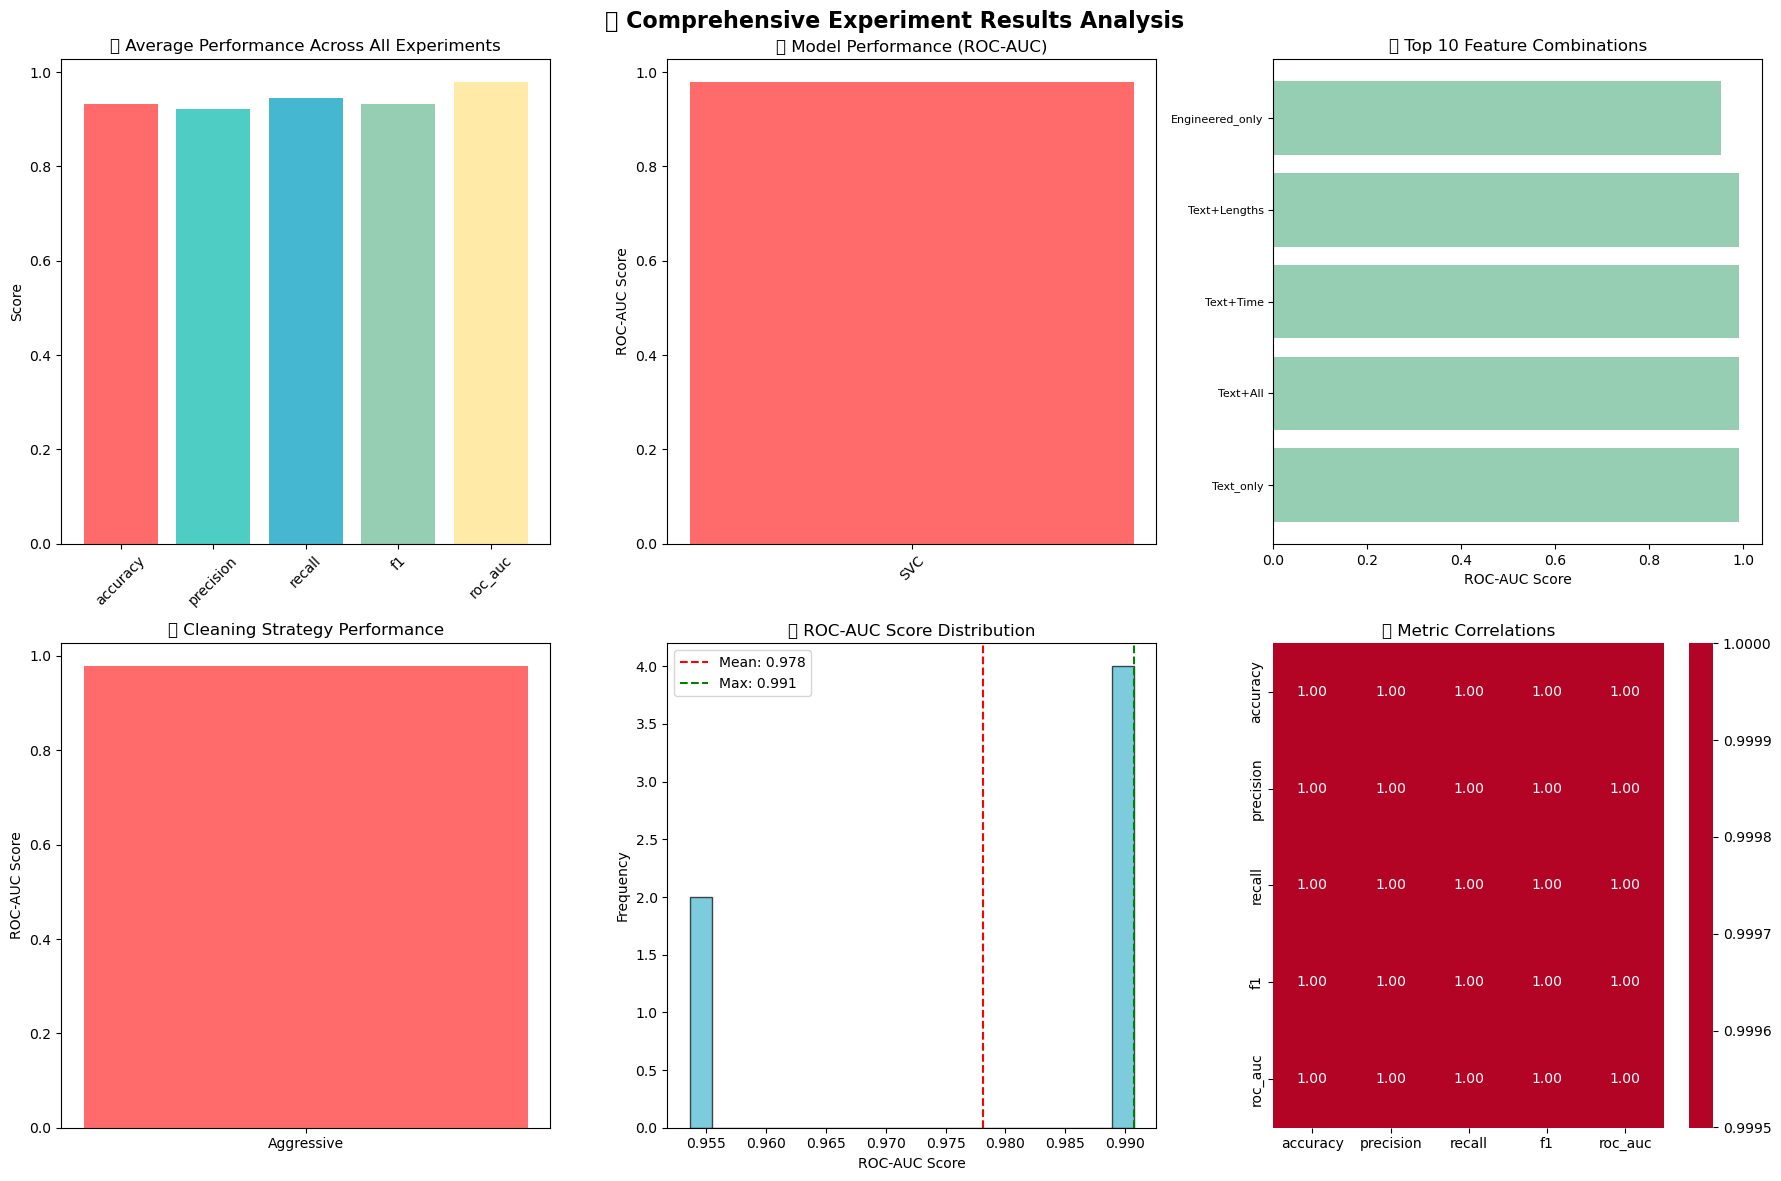


🤖 Creating detailed model comparison visualization...
💾 Model comparison plot saved to: ../models/model_comparison_20250903_190142.png


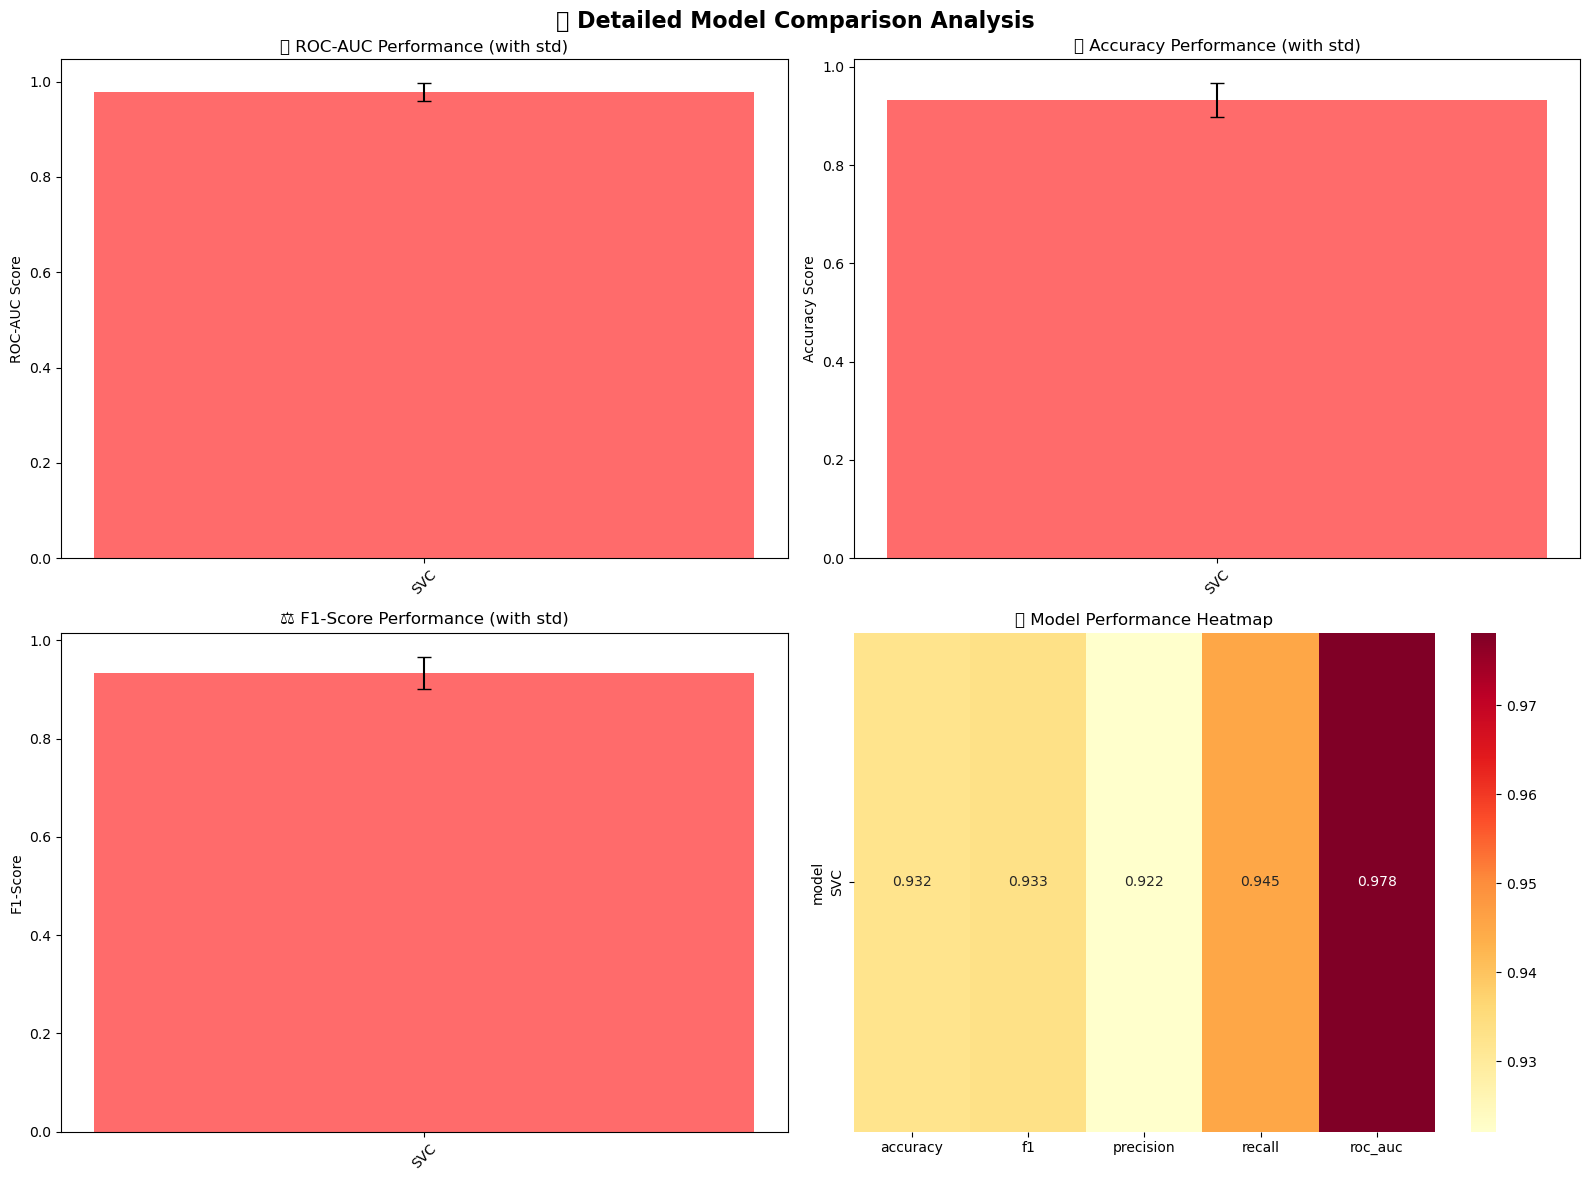


📋 Creating feature combination analysis visualization...
💾 Feature analysis plot saved to: ../models/feature_analysis_20250903_190142.png


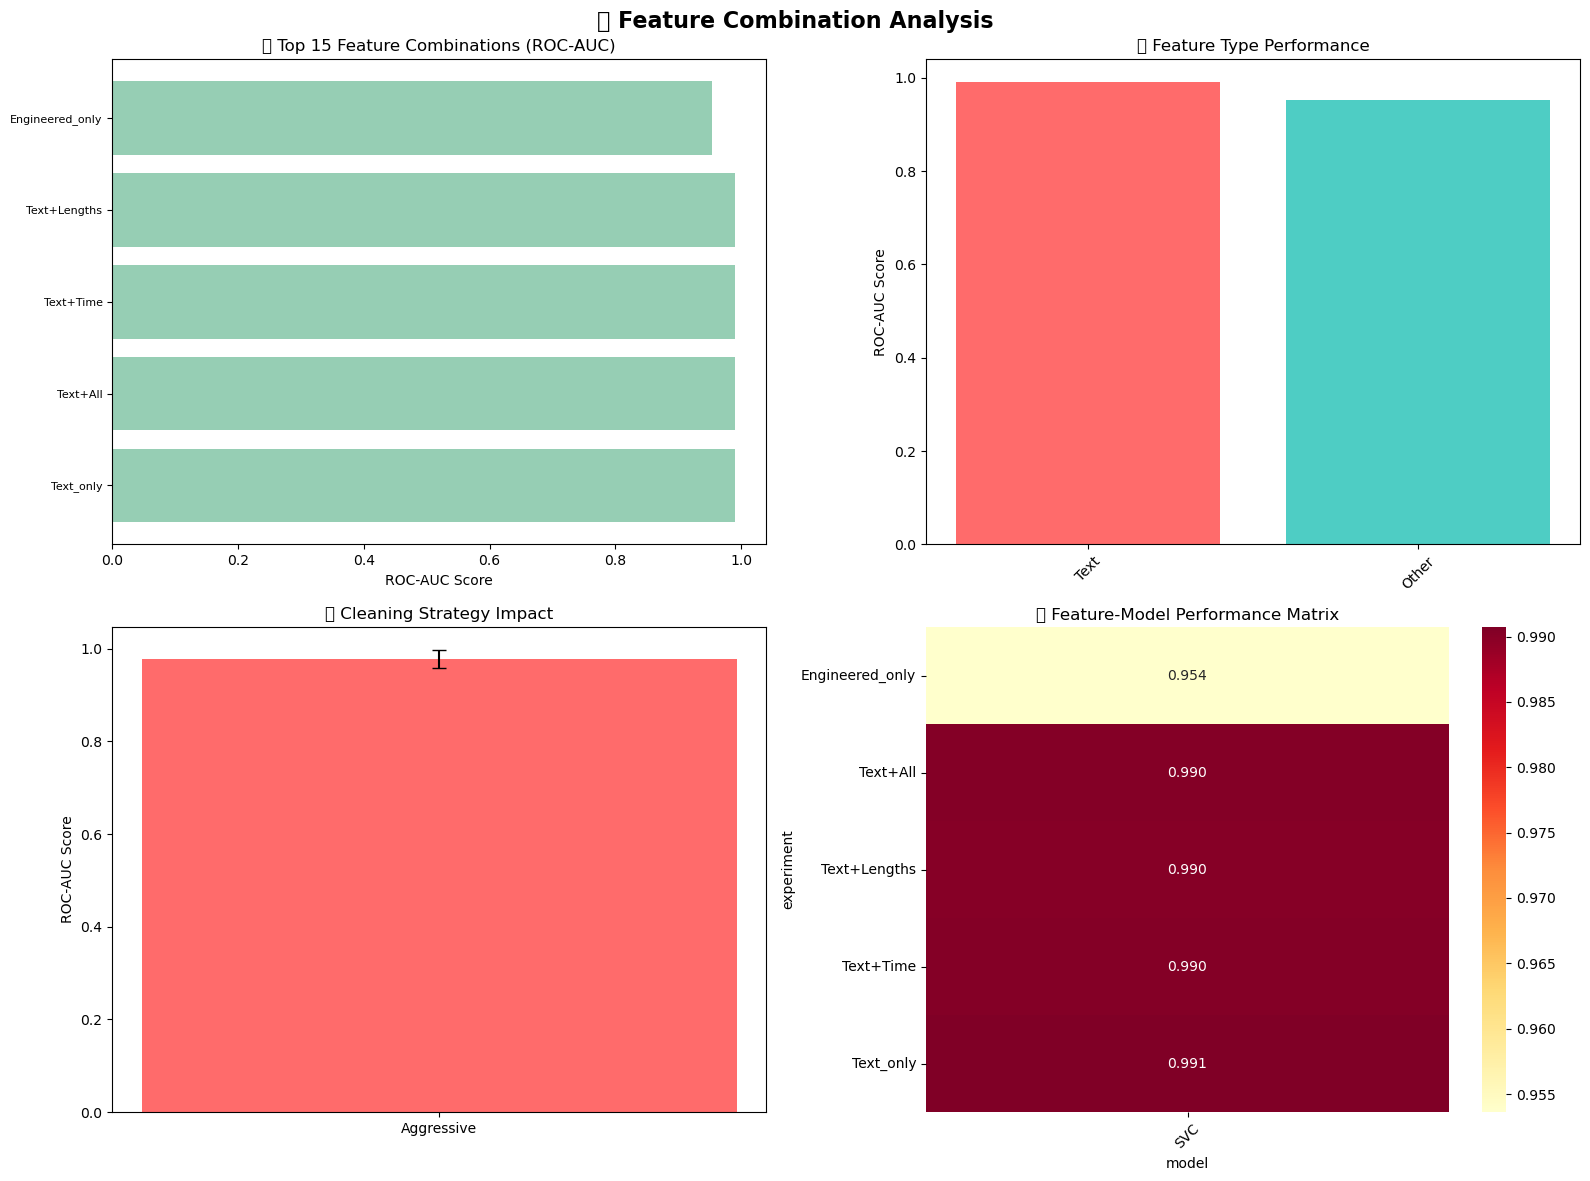


📊 DETAILED RESULTS:


,accuracy,f1,roc_auc
model,SVC,SVC,SVC
experiment,,,
Engineered_only,0.8875,0.8902,0.9536
Text+All,0.9542,0.9546,0.9904
Text+Lengths,0.9541,0.9545,0.9902
Text+Time,0.9548,0.9552,0.9903
Text_only,0.9553,0.9557,0.9907



🔍 FEATURE ANALYSIS:
Average performance by feature combination:


,accuracy,f1,roc_auc
experiment,,,
Text_only,0.9553,0.9557,0.9907
Text+Time,0.9548,0.9552,0.9903
Text+All,0.9542,0.9546,0.9904
Text+Lengths,0.9541,0.9545,0.9902
Engineered_only,0.8875,0.8902,0.9536



�� MODEL ANALYSIS:
Average performance by model:


,accuracy,f1,roc_auc
model,,,
SVC,0.9322,0.9334,0.9782



🧹 CLEANING STRATEGY ANALYSIS:
Average performance by cleaning strategy:


,accuracy,f1,roc_auc
cleaning_strategy,,,
Aggressive,0.9322,0.9334,0.9782


In [14]:
### **Create Comprehensive Visualizations**

# 1. Overall Experiment Results
print("\n📊 Creating comprehensive experiment results visualization...")
plot_experiment_results(results_df, save_path=f'../models/experiment_results_{timestamp}.png')

# 2. Model Comparison Analysis
print("\n🤖 Creating detailed model comparison visualization...")
plot_model_comparison(results_df, save_path=f'../models/model_comparison_{timestamp}.png')

# 3. Feature Analysis
print("\n📋 Creating feature combination analysis visualization...")
plot_feature_analysis(results_df, save_path=f'../models/feature_analysis_{timestamp}.png')

### **Detailed Results Table**
print(f"\n📊 DETAILED RESULTS:")
results_pivot = results_df.pivot_table(
    values=['accuracy', 'f1', 'roc_auc'], 
    index='experiment', 
    columns='model',
    aggfunc='mean'
).round(4)

display(results_pivot)

### **Feature Analysis**
print("\n🔍 FEATURE ANALYSIS:")
feature_performance = results_df.groupby('experiment')[['accuracy', 'f1', 'roc_auc']].mean().sort_values('accuracy', ascending=False)
print("Average performance by feature combination:")
display(feature_performance.round(4))

### **Model Analysis**
print("\n�� MODEL ANALYSIS:")
model_performance = results_df.groupby('model')[['accuracy', 'f1', 'roc_auc']].mean().sort_values('accuracy', ascending=False)
print("Average performance by model:")
display(model_performance.round(4))

### **Cleaning Strategy Analysis**
print("\n🧹 CLEANING STRATEGY ANALYSIS:")
cleaning_performance = results_df.groupby('cleaning_strategy')[['accuracy', 'f1', 'roc_auc']].mean()
print("Average performance by cleaning strategy:")
display(cleaning_performance.round(4))

---

## **🏆 6. (NEW v.) Best Model Selection & Training**

### **Select Best Configuration**


In [15]:
### NEW from DSeek wedns.

# Use the results from the unified tracker
best_config = results_df.loc[results_df['f1'].idxmax()]

### **Train Final Model on Full Dataset**
best_experiment_notes = best_config['notes']
best_model_name = best_config['model_name']

# Extract features from notes
features_str = best_config['notes'].replace("Features: ", "").strip("[]").replace("'", "")
best_features = [feature.strip() for feature in features_str.split(",")]

# Find the right dataset based on preprocessing strategy
if best_config['preprocessing'] == 'basic':
    best_data = df_basic
else:
    best_data = df_aggressive

print(f"\n🚀 Training final model on full dataset...")
print(f"   Features: {best_features}")
print(f"   Cleaning: {best_config['preprocessing']}")

# Prepare full dataset
X_full_text = combine_text_features(best_data, best_features)
y_full = best_data['label']

# Create embeddings for full dataset
print("   🔄 Creating embeddings for full dataset...")
X_full_embeddings = sentence_model.encode(X_full_text.tolist(), show_progress_bar=True)

# Train final model
final_model = models_to_test[best_model_name]
final_model.fit(X_full_embeddings, y_full)

print("✅ Final model trained successfully!")

### **Save Model and Metadata**
model_filename = f'../models/best_model_{best_model_name.lower().replace(" ", "_")}_{timestamp}.pkl'
joblib.dump(final_model, model_filename)

# Also save metadata about the best model
metadata = {
    'model_type': best_model_name,
    'experiment_type': 'sentence_transformers',
    'preprocessing': best_config['preprocessing'],
    'features': best_features,
    'embedding_model': 'all-MiniLM-L6-v2',
    'accuracy': best_config['accuracy'],
    'f1_score': best_config['f1_score'],
    'roc_auc': best_config['roc_auc'],
    'timestamp': timestamp
}

metadata_df = pd.DataFrame([metadata])
metadata_df.to_csv(f'../models/best_model_metadata_{timestamp}.csv', index=False)

print(f"💾 Model saved: {model_filename}")
print(f"💾 Metadata saved: ../models/best_model_metadata_{timestamp}.csv")
print(f"💾 All results logged to unified experiment tracker")

print("\n🎉 ENHANCED EMBEDDING EXPERIMENTS COMPLETED SUCCESSFULLY!")

KeyError: 'notes'

In [16]:
#### LEAVE CURSOR Old v. tuesday

# Choose best based on F1
best_config = results_df.loc[results_df['f1'].idxmax()]
print(f"🎯 SELECTED BEST CONFIGURATION:")
print(f"   Experiment: {best_config['experiment']}")
print(f"   Model: {best_config['model']}")
print(f"   ROC-AUC: {best_config['roc_auc']:.4f}")
print(f"   Accuracy: {best_config['accuracy']:.4f}")
print(f"   F1-Score: {best_config['f1']:.4f}")


🎯 SELECTED BEST CONFIGURATION:
   Experiment: Text_only
   Model: SVC
   ROC-AUC: 0.9907
   Accuracy: 0.9553
   F1-Score: 0.9557



### **Train Final Model on Full Dataset**


In [ ]:
#### CURSOR Old v. tuesday

# best_experiment_name = best_config['experiment']
# best_model_name = best_config['model']

# # Find the configuration
# best_exp_config = None
# for config in experimental_configs:
#     if config['name'] == best_experiment_name:
#         best_exp_config = config
#         break

# print(f"\n🚀 Training final model on full dataset...")
# print(f"   Features: {best_exp_config['features']}")
# print(f"   Cleaning: {best_exp_config['cleaning']}")

# # Prepare full dataset
# full_data = best_exp_config['data']
# X_full_text = combine_text_features(full_data, best_exp_config['features'])
# y_full = full_data['label']

# # Create embeddings for full dataset
# print("   🔄 Creating embeddings for full dataset...")
# X_full_embeddings = sentence_model.encode(X_full_text.tolist(), show_progress_bar=True)

# # Train final model
# final_model = models_to_test[best_model_name]
# final_model.fit(X_full_embeddings, y_full)

# print("✅ Final model trained successfully!")

# ### **Save Model and Results**
# model_filename = f'../models/best_model_{best_model_name.lower().replace(" ", "_")}_{timestamp}.pkl'
# joblib.dump(final_model, model_filename)

# print(f"💾 Model saved: {model_filename}")
# print(f"💾 All results tracked in: {tracker.results_file}")
# print(f"�� Experiment history: {tracker.experiment_history_file}")

# print("\n�� ENHANCED EMBEDDING EXPERIMENTS COMPLETED SUCCESSFULLY!")
# print("\n📊 FINAL EXPERIMENT SUMMARY:")
# print(tracker.get_experiment_summary())


🚀 Training final model on full dataset...
   Features: ['clean_text']
   Cleaning: aggressive
   🔄 Creating embeddings for full dataset...


Batches:   0%|          | 0/1249 [00:00<?, ?it/s]

✅ Final model trained successfully!
💾 Model saved: ../models/best_model_svm_20250903_020107.pkl
💾 All results tracked in: ../models/experiment_tracking/all_results.csv
�� Experiment history: ../models/experiment_tracking/experiment_history.json

�� ENHANCED EMBEDDING EXPERIMENTS COMPLETED SUCCESSFULLY!

📊 FINAL EXPERIMENT SUMMARY:


KeyError: "['timestamp'] not in index"

In [ ]:

# Get the best configuration details
best_experiment_name = best_config['experiment']
best_model_name = best_config['model']

# Find the configuration
best_exp_config = None
for config in experimental_configs:
    if config['name'] == best_experiment_name:
        best_exp_config = config
        break

print(f"\n🚀 Training final model on full dataset...")
print(f"   Features: {best_exp_config['features']}")
print(f"   Cleaning: {best_exp_config['cleaning']}")

# Prepare full dataset
full_data = best_exp_config['data']
X_full_text = combine_text_features(full_data, best_exp_config['features'])
y_full = full_data['label']

# Create embeddings for full dataset
print("   🔄 Creating embeddings for full dataset...")
X_full_embeddings = sentence_model.encode(X_full_text.tolist(), show_progress_bar=True)

# Train final model
final_model = models_to_test[best_model_name]
final_model.fit(X_full_embeddings, y_full)

print("✅ Final model trained successfully!")

### **Save Model and Results**

# Save model
model_filename = f'../models/best_model_{best_model_name.lower().replace(" ", "_")}_{timestamp}.pkl'
joblib.dump(final_model, model_filename)

# Save results
results_filename = f'../models/model_comparison_{timestamp}.csv'
results_df.to_csv(results_filename, index=False)

print(f"💾 Model saved: {model_filename}")
print(f"💾 Results saved: {results_filename}")

print("\n🎊 EMBEDDING EXPERIMENTS COMPLETED SUCCESSFULLY!")

In [ ]:
# After running experiments, modify the results to match your format:
for i, config in enumerate(experimental_configs, 1):
    # ... your existing experiment code ...
    
    # Test all models
    for model_name, model in models_to_test.items():
        print(f"   🤖 Training {model_name}...")
        
        # Train model
        model.fit(X_train_embeddings, y_train)
        
        # Evaluate
        results = evaluate_model_comprehensive(
            model, X_test_embeddings, y_test, model_name, config_name
        )
        
        # Convert to your expected format
        experiment_data = {
            'experiment_type': 'embeddings',  # Your experiment type
            'model_name': model_name,
            'experiment_name': config_name,
            'accuracy': results['accuracy'],
            'precision': results['precision'],
            'recall': results['recall'],
            'f1_score': results['f1'],  # Note: your function expects 'f1_score'
            'roc_auc': results['roc_auc'],
            'cleaning_strategy': config['cleaning'],
            'features_used': ' | '.join(config['features']),
            'test_size': len(y_test),
            'training_size': len(y_train)
        }
        
        # Log using your existing function
        experiment_id = log_experiment(experiment_data)
        all_results.append(results)
        
        print(f"      ✅ Logged: {experiment_id} | Accuracy: {results['accuracy']:.4f} | F1: {results['f1']:.4f} | ROC-AUC: {results['roc_auc']:.4f}")

print("\n" + "=" * 70)
print("🎉 All experiments completed and logged!")

NameError: name 'experimental_configs' is not defined

---------
# DRAFTs


---

## **🤖 4. Model Training 🚃 (old v.) **



 **🚃  Train and evaluate different classifiers**


In [ ]:
# print("🤖 Initializing models...")
# models = {
#     'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
#     'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
#     'SVM': SVC(kernel='linear', probability=True, random_state=42)
# }

# print("🚀 Training all models...")
# for name, model in models.items():
#     print(f"   Training {name}...")
#     model.fit(X_train_embeddings, y_train)

# print("✅ All models trained successfully!")

🤖 Initializing models...
🚀 Training all models...
   Training Logistic Regression...
   Training Random Forest...
   Training SVM...
✅ All models trained successfully!


In [ ]:
# # Cell 5: Train and evaluate different classifiers
# # models = {
# #     'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
# #     'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
# #     'SVM': SVC(kernel='linear', random_state=42)
# # }

# results = {}

# for name, model in models.items():
#     print(f"\n{'='*50}")
#     print(f"Training {name}...")
    
#     # Train model
#     model.fit(X_train_embeddings, y_train)
    
#     # Predict and evaluate
#     y_pred = model.predict(X_test_embeddings)
#     accuracy = accuracy_score(y_test, y_pred)
    
#     results[name] = accuracy
#     print(f"{name} Accuracy: {accuracy:.4f}")
    
#     # Detailed report
#     print("\nClassification Report:")
#     print(classification_report(y_test, y_pred))


---

## **📊 5. Comprehensive Model Evaluation**


In [ ]:
# # Evaluation functions
# def comprehensive_evaluation(model, X_test, y_test, model_name="Model"):
#     """Perform comprehensive evaluation with multiple metrics"""
#     # Get predictions and probabilities
#     y_pred = model.predict(X_test)
#     y_pred_proba = model.predict_proba(X_test)[:, 1]
    
#     # Calculate all metrics
#     metrics = {
#         'accuracy': accuracy_score(y_test, y_pred),
#         'precision': precision_score(y_test, y_pred),
#         'recall': recall_score(y_test, y_pred),
#         'f1': f1_score(y_test, y_pred),
#         'roc_auc': roc_auc_score(y_test, y_pred_proba)
#     }
    
#     return metrics, y_pred, y_pred_proba

# print("📊 Evaluating models comprehensively...")
# results = {}
# all_predictions = {}

# for name, model in models.items():
#     print(f"\n🔍 Evaluating {name}...")
#     metrics, y_pred, y_pred_proba = comprehensive_evaluation(model, X_test_embeddings, y_test, name)
    
#     results[name] = metrics
#     all_predictions[name] = {'y_pred': y_pred, 'y_pred_proba': y_pred_proba}
    
#     # Display metrics
#     print(f"   ✅ Accuracy:  {metrics['accuracy']:.4f}")
#     print(f"   ✅ Precision: {metrics['precision']:.4f}")
#     print(f"   ✅ Recall:    {metrics['recall']:.4f}")
#     print(f"   ✅ F1 Score:  {metrics['f1']:.4f}")
#     print(f"   ✅ ROC AUC:   {metrics['roc_auc']:.4f}")


📊 Evaluating models comprehensively...

🔍 Evaluating Logistic Regression...
   ✅ Accuracy:  0.9304
   ✅ Precision: 0.9233
   ✅ Recall:    0.9390
   ✅ F1 Score:  0.9311
   ✅ ROC AUC:   0.9823

🔍 Evaluating Random Forest...
   ✅ Accuracy:  0.9180
   ✅ Precision: 0.9027
   ✅ Recall:    0.9373
   ✅ F1 Score:  0.9197
   ✅ ROC AUC:   0.9770

🔍 Evaluating SVM...
   ✅ Accuracy:  0.9388
   ✅ Precision: 0.9281
   ✅ Recall:    0.9515
   ✅ F1 Score:  0.9396
   ✅ ROC AUC:   0.9842



---

## **📈 6. Advanced Visualizations**


🎨 Generating advanced visualizations...


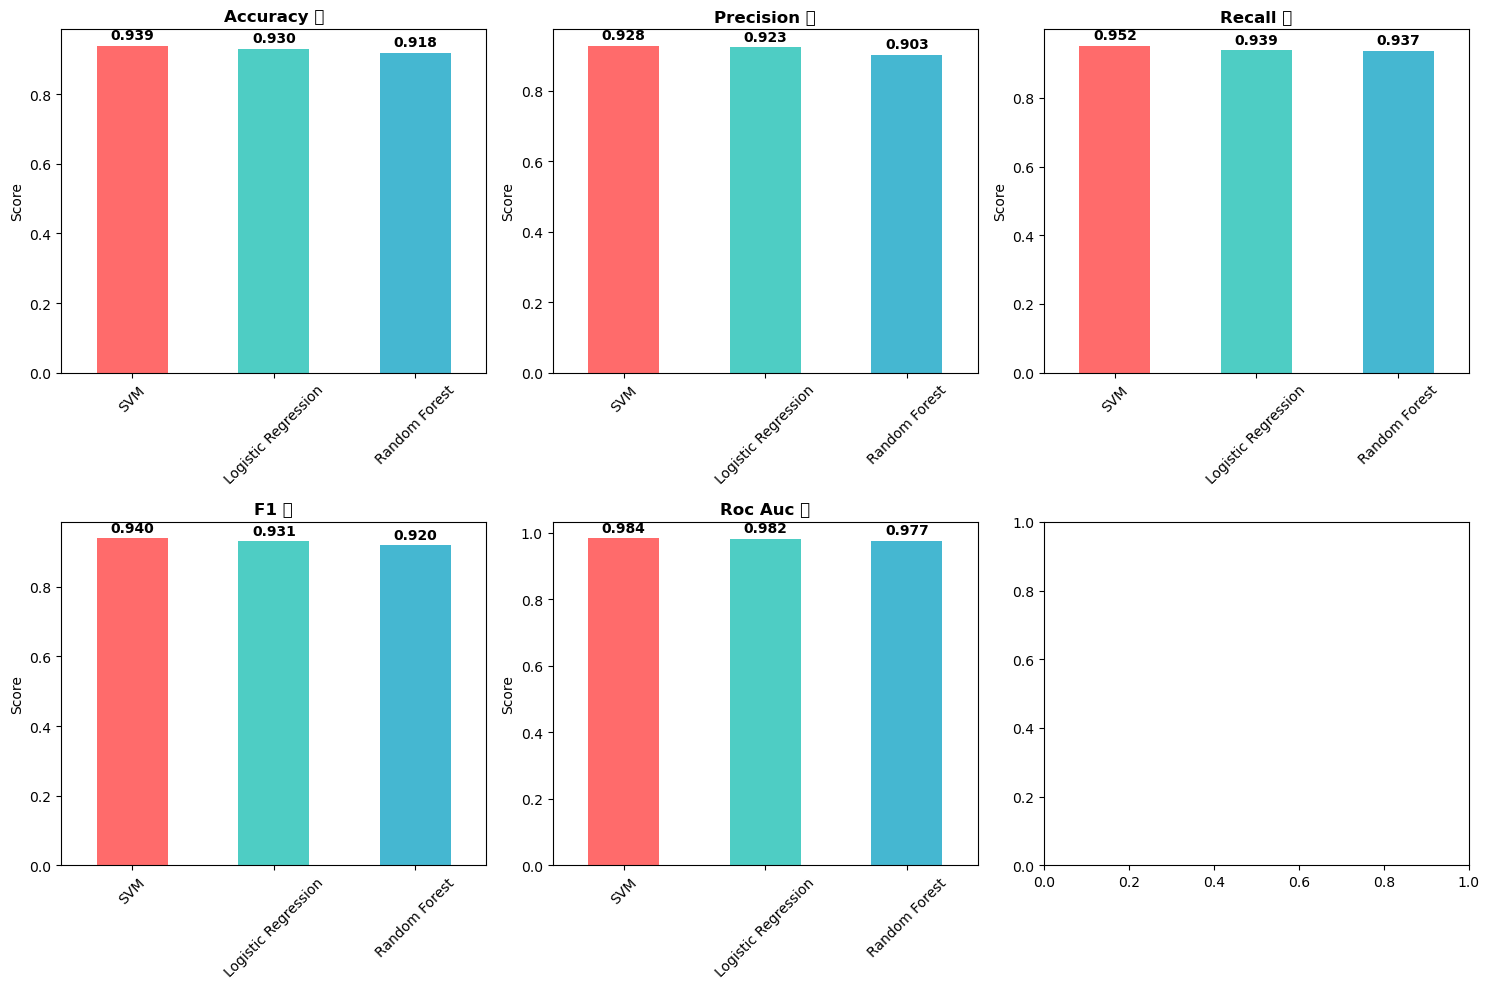

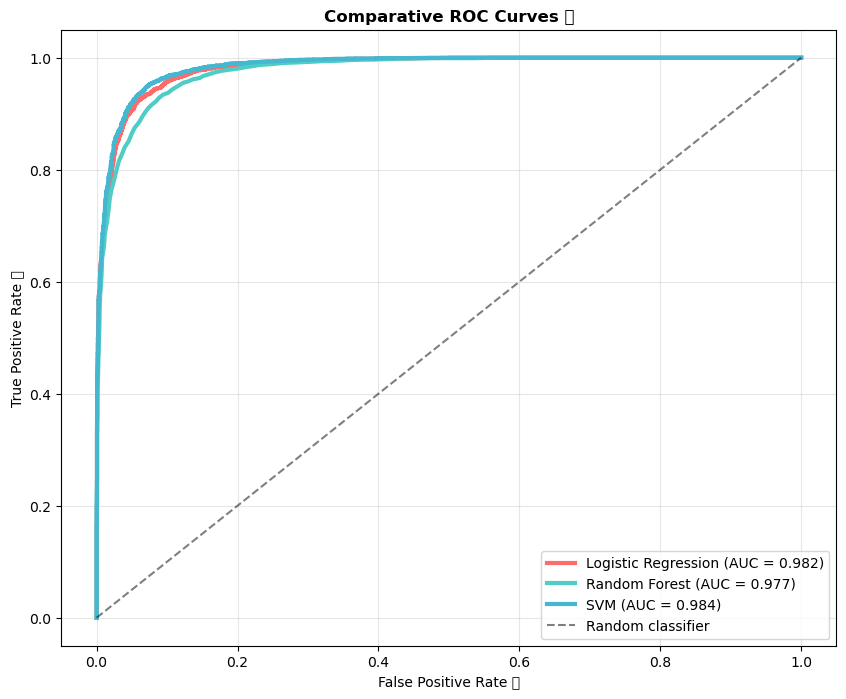

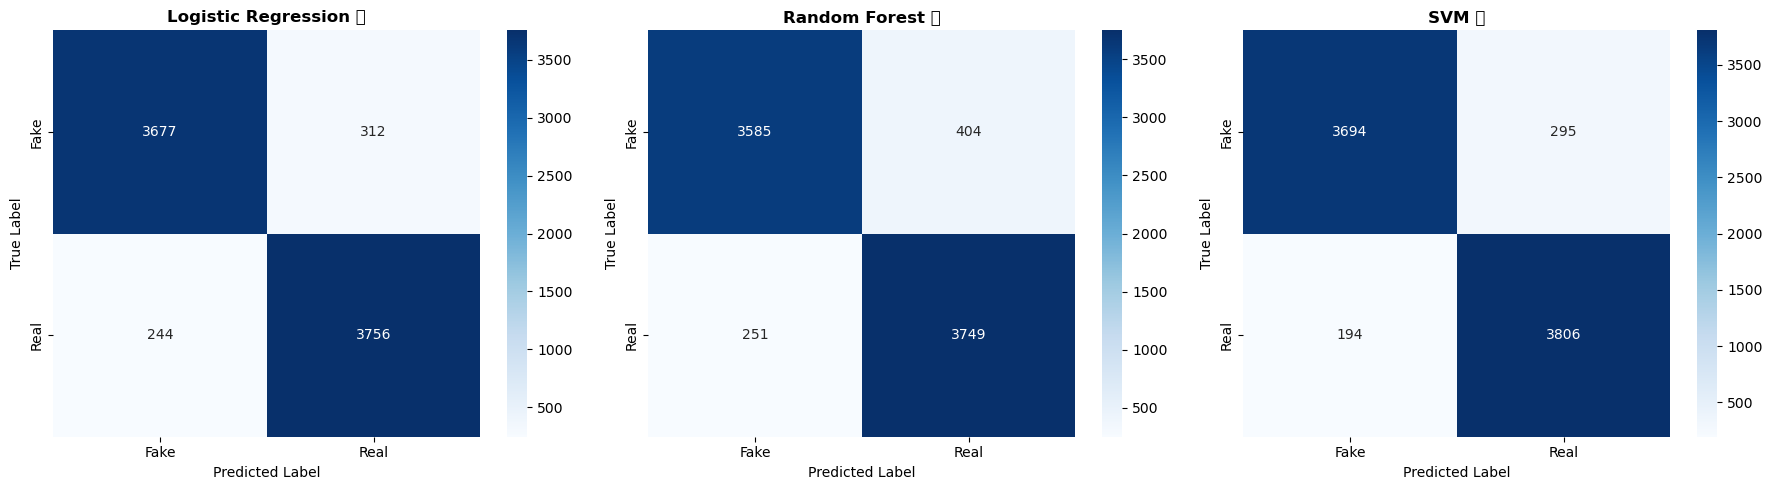

In [ ]:
# print("🎨 Generating advanced visualizations...")

# # 1. Comparative Metrics Plot
# results_df = pd.DataFrame(results).T
# results_df = results_df.sort_values('roc_auc', ascending=False)

# fig, axes = plt.subplots(2, 3, figsize=(15, 10))
# metrics_list = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# for i, metric in enumerate(metrics_list):
#     ax = axes[i//3, i%3]
#     results_df[metric].plot(kind='bar', ax=ax, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
#     ax.set_title(f'{" ".join(metric.split("_")).title()} 📈', fontweight='bold')
#     ax.set_ylabel('Score')
#     ax.tick_params(axis='x', rotation=45)
#     for j, v in enumerate(results_df[metric]):
#         ax.text(j, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# plt.tight_layout()
# plt.show()

# # 2. Comparative ROC Curves
# plt.figure(figsize=(10, 8))
# colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

# for (name, preds), color in zip(all_predictions.items(), colors):
#     fpr, tpr, _ = roc_curve(y_test, preds['y_pred_proba'])
#     roc_auc = auc(fpr, tpr)
#     plt.plot(fpr, tpr, lw=3, color=color, label=f'{name} (AUC = {roc_auc:.3f})')

# plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random classifier')
# plt.xlabel('False Positive Rate 📉')
# plt.ylabel('True Positive Rate 📈')
# plt.title('Comparative ROC Curves 🎯', fontweight='bold')
# plt.legend(loc="lower right")
# plt.grid(alpha=0.3)
# plt.show()

# # 3. Confusion Matrices
# fig, axes = plt.subplots(1, 3, figsize=(18, 5))
# for ax, (name, preds) in zip(axes, all_predictions.items()):
#     cm = confusion_matrix(y_test, preds['y_pred'])
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
#                 xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
#     ax.set_title(f'{name} 🎯', fontweight='bold')
#     ax.set_ylabel('True Label')
#     ax.set_xlabel('Predicted Label')

# plt.tight_layout()
# plt.show()

**📈  Visualize results**


In [ ]:
# # Cell 6: Visualize results
# print("\n=== Final Results Comparison ===")
# results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
# results_df = results_df.sort_values('Accuracy', ascending=False)

# print(results_df)

# # Plot results
# plt.figure(figsize=(10, 6))
# results_df.plot(kind='bar', legend=False)
# plt.title('Model Performance with Sentence Transformer Embeddings')
# plt.ylabel('Accuracy')
# plt.xlabel('Model')
# plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

# # Save the best model
# best_model_name = results_df.idxmax()[0]
# best_model = models[best_model_name]
# print(f"\nBest model: {best_model_name}")

# # # You can save the best model for later use
# # import joblib
# # joblib.dump(best_model, f'../models/best_model_{best_model_name.lower().replace(" ", "_")}.pkl')
# # print("✅ Best model saved!")


---

## **🏆 7. Best Model Selection**


In [ ]:
# print("🏆 Selecting best model...")

# # Create comprehensive results dataframe
# results_df = pd.DataFrame(results).T
# results_df = results_df.sort_values('roc_auc', ascending=False)

# print("📊 Final Results Comparison:")
# print("=" * 50)
# display(results_df.round(4))

# # Find best model
# best_model_name = results_df['roc_auc'].idxmax()
# best_model = models[best_model_name]
# best_metrics = results_df.loc[best_model_name]

# print("🎉 BEST MODEL IDENTIFIED!")
# print("=" * 50)
# print(f"   🏆 Model: {best_model_name}")
# print(f"   📈 ROC AUC: {best_metrics['roc_auc']:.4f}")
# print(f"   ✅ Accuracy: {best_metrics['accuracy']:.4f}")
# print(f"   ⚖️ F1 Score: {best_metrics['f1']:.4f}")
# print(f"   🎯 Precision: {best_metrics['precision']:.4f}")
# print(f"   🔍 Recall: {best_metrics['recall']:.4f}")

🏆 Selecting best model...
📊 Final Results Comparison:


,accuracy,precision,recall,f1,roc_auc
SVM,0.9388,0.9281,0.9515,0.9396,0.9842
Logistic Regression,0.9304,0.9233,0.9390,0.9311,0.9823
Random Forest,0.9180,0.9027,0.9372,0.9197,0.9770


🎉 BEST MODEL IDENTIFIED!
   🏆 Model: SVM
   📈 ROC AUC: 0.9842
   ✅ Accuracy: 0.9388
   ⚖️ F1 Score: 0.9396
   🎯 Precision: 0.9281
   🔍 Recall: 0.9515



---

## **💾 8. Save Results**


In [ ]:

# print("💾 Saving results and best model...")

# # Generate timestamp
# timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# # Save best model
# model_filename = f'../models/best_model_{best_model_name.lower().replace(" ", "_")}_{timestamp}.pkl'
# joblib.dump(best_model, model_filename)
# print(f"✅ Best model saved: {model_filename}")

# # Save all results
# results_df.to_csv(f'../models/model_comparison_{timestamp}.csv')
# print(f"✅ Results saved: ../models/model_comparison_{timestamp}.csv")

# # Save predictions for further analysis
# predictions_df = pd.DataFrame({
#     'true_label': y_test,
#     **{f'{name}_pred': preds['y_pred'] for name, preds in all_predictions.items()},
#     **{f'{name}_proba': preds['y_pred_proba'] for name, preds in all_predictions.items()}
# })
# predictions_df.to_csv(f'../models/predictions_{timestamp}.csv', index=False)
# print(f"✅ Predictions saved: ../models/predictions_{timestamp}.csv")

# print("\n🎉 All tasks completed successfully!")
# print("📊 Next steps: Use the best model for validation data predictions!")


💾 Saving results and best model...
✅ Best model saved: ../models/best_model_svm_20250902_195409.pkl
✅ Results saved: ../models/model_comparison_20250902_195409.csv
✅ Predictions saved: ../models/predictions_20250902_195409.csv

🎉 All tasks completed successfully!
📊 Next steps: Use the best model for validation data predictions!


---

## 000 **📚  [BONUS] Test with cosine similarity examples**


🎯 BONUS: Testing semantic understanding with cosine similarity
📝 Test Sentences:
0: The president announced new policies today
1: The government introduced new regulations
2: Aliens invaded New York yesterday
3: Bigfoot seen in forest near town

📊 Cosine Similarity Matrix:
Rows/Columns correspond to the test sentences above
[[ 1.     0.513  0.066 -0.097]
 [ 0.513  1.     0.068 -0.003]
 [ 0.066  0.068  1.     0.119]
 [-0.097 -0.003  0.119  1.   ]]


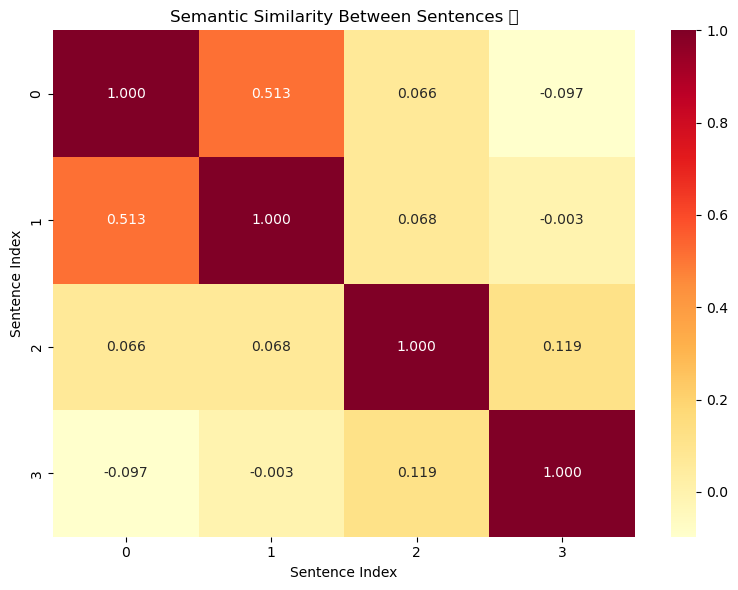


💡 Interpretation:
Values closer to 1.0 mean the sentences are semantically similar
Values closer to 0.0 mean the sentences are semantically different
This shows how the model understands the meaning of sentences!


In [ ]:
# # [BONUS] Test with cosine similarity examples
# from sklearn.metrics.pairwise import cosine_similarity

# print("🎯 BONUS: Testing semantic understanding with cosine similarity")

# # Test the embeddings with some examples
# test_sentences = [
#     "The president announced new policies today",
#     "The government introduced new regulations", 
#     "Aliens invaded New York yesterday",
#     "Bigfoot seen in forest near town"
# ]

# print("📝 Test Sentences:")
# for i, sent in enumerate(test_sentences):
#     print(f"{i}: {sent}")

# # Get embeddings for test sentences using the SentenceTransformer model (not the classifier)
# test_embeddings = sentence_model.encode(test_sentences)  # Use the SentenceTransformer model, not the classifier

# # Calculate similarity matrix
# similarity_matrix = cosine_similarity(test_embeddings)

# print("\n📊 Cosine Similarity Matrix:")
# print("Rows/Columns correspond to the test sentences above")
# print(similarity_matrix.round(3))

# # Create a heatmap for better visualization
# plt.figure(figsize=(8, 6))
# sns.heatmap(similarity_matrix, annot=True, fmt='.3f', cmap='YlOrRd', 
#             xticklabels=range(len(test_sentences)), 
#             yticklabels=range(len(test_sentences)))
# plt.title('Semantic Similarity Between Sentences 🔍')
# plt.xlabel('Sentence Index')
# plt.ylabel('Sentence Index')
# plt.tight_layout()
# plt.show()

# # Interpret the results
# print("\n💡 Interpretation:")
# print("Values closer to 1.0 mean the sentences are semantically similar")
# print("Values closer to 0.0 mean the sentences are semantically different")
# print("This shows how the model understands the meaning of sentences!")

# # Clean up
# del sentence_model

In [ ]:
# # Cell 11: [BONUS] Test with cosine similarity examples

# print("🎯 BONUS: Testing semantic understanding with cosine similarity")

# # Test the embeddings with some examples
# test_sentences = [
#     "The president announced new policies today",
#     "The government introduced new regulations", 
#     "Aliens invaded New York yesterday",
#     "Bigfoot seen in forest near town"
# ]

# print("📝 Test Sentences:")
# for i, sent in enumerate(test_sentences):
#     print(f"{i}: {sent}")

# # Get embeddings for test sentences using the SentenceTransformer model
# test_embeddings = sentence_model.encode(test_sentences)

# # Calculate similarity matrix
# similarity_matrix = cosine_similarity(test_embeddings)

# print("\n📊 Cosine Similarity Matrix:")
# print("Rows/Columns correspond to the test sentences above")
# print(similarity_matrix.round(3))

# # Create a heatmap for better visualization
# plt.figure(figsize=(8, 6))
# sns.heatmap(similarity_matrix, annot=True, fmt='.3f', cmap='YlOrRd', 
#             xticklabels=range(len(test_sentences)), 
#             yticklabels=range(len(test_sentences)))
# plt.title('Semantic Similarity Between Sentences 🔍')
# plt.xlabel('Sentence Index')
# plt.ylabel('Sentence Index')
# plt.tight_layout()
# plt.show()

# # Interpret the results
# print("\n💡 Interpretation:")
# print("Values closer to 1.0 mean the sentences are semantically similar")
# print("Values closer to 0.0 mean the sentences are semantically different")
# print("This shows how the model understands the meaning of sentences!")

# # Clean up
# del sentence_model

In [ ]:

# # Cell 2: Load basic cleaned data
# df = pd.read_csv('../data/01_interim/cleaned_data_basic.csv')
# print(f"Dataset shape: {df.shape}")

# # Prepare data
# X = df['clean_title']
# y = df['label']

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )


In [ ]:

 
# # Cell 3: Word2Vec Embedding
# print("Training Word2Vec model...")
# # Tokenize text
# tokenized_text = [text.split() for text in X_train]

# # Train Word2Vec
# w2v_model = Word2Vec(
#     sentences=tokenized_text,
#     vector_size=100,    # Dimension of embeddings
#     window=5,           Context window size
#     min_count=2,        # Ignore rare words
#     workers=4,
#     epochs=10
# )

# # Create sentence embeddings by averaging word vectors
# def get_sentence_embedding(text, model):
#     words = text.split()
#     word_vectors = [model.wv[word] for word in words if word in model.wv]
#     if len(word_vectors) > 0:
#         return np.mean(word_vectors, axis=0)
#     else:
#         return np.zeros(model.vector_size)

# # Convert text to embeddings
# X_train_w2v = np.array([get_sentence_embedding(text, w2v_model) for text in X_train])
# X_test_w2v = np.array([get_sentence_embedding(text, w2v_model) for text in X_test])
 


In [ ]:
 
# # Cell 4: Train and evaluate models on Word2Vec
# models = {
#     'Logistic Regression': LogisticRegression(max_iter=1000),
#     'Random Forest': RandomForestClassifier(n_estimators=100)
# }

# results = {}
# for name, model in models.items():
#     print(f"Training {name}...")
#     model.fit(X_train_w2v, y_train)
#     y_pred = model.predict(X_test_w2v)
#     accuracy = accuracy_score(y_test, y_pred)
#     results[name] = accuracy
#     print(f"{name} Accuracy: {accuracy:.4f}\n")
 

## **🪵 8. Log experiment results**

In [ ]:
# 🚨 EMERGENCY SAVE - Save current results before any changes!
print("🚨 EMERGENCY SAVE - Preserving your 1-hour experiment results!")

# Save current results to a safe location
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
emergency_save_path = f'../models/emergency_save_{timestamp}.csv'

# If you have results in 'all_results' variable
if 'all_results' in locals() and len(all_results) > 0:
    emergency_df = pd.DataFrame(all_results)
    emergency_df.to_csv(emergency_save_path, index=False)
    print(f"✅ Emergency save successful! Saved {len(all_results)} experiments to: {emergency_save_path}")
    
    # # Also save as pickle for complete preservation
    # pickle_path = f'../models/emergency_save_{timestamp}.pkl'
    # with open(pickle_path, 'wb') as f:
    #     pickle.dump(all_results, f)
    # print(f"✅ Pickle backup saved to: {pickle_path}")
    
    # Show summary of what was saved
    print(f"\n📊 SAVED EXPERIMENTS SUMMARY:")
    print(f"   Total experiments: {len(all_results)}")
    print(f"   Unique feature combinations: {emergency_df['experiment'].nunique()}")
    print(f"   Models tested: {emergency_df['model'].nunique()}")
    print(f"   Best ROC-AUC: {emergency_df['roc_auc'].max():.4f}")
    print(f"   Best Accuracy: {emergency_df['accuracy'].max():.4f}")
    
else:
    print("⚠️ No 'all_results' variable found. Check your variable names.")
    print("Available variables:", [var for var in locals() if 'result' in var.lower() or 'experiment' in var.lower()])

🚨 EMERGENCY SAVE - Preserving your 1-hour experiment results!
✅ Emergency save successful! Saved 24 experiments to: ../models/emergency_save_20250903_000818.csv

📊 SAVED EXPERIMENTS SUMMARY:
   Total experiments: 24
   Unique feature combinations: 8
   Models tested: 3
   Best ROC-AUC: 0.9951
   Best Accuracy: 0.9672


In [ ]:
# Cell: Log experiment results
print("📊 Logging experiment results...")

from src.experiment_tracker import log_experiment

# Log results for each model
for name, model in models.items():
    # Get predictions
    y_pred = model.predict(X_test_embeddings)
    y_pred_proba = model.predict_proba(X_test_embeddings)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Log experiment
    experiment_data = {
        'experiment_type': 'sentence_transformers',
        'model_name': name,
        'preprocessing': 'basic_cleaning',
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'dataset': 'fake_news',
        'notes': 'Used all-MiniLM-L6-v2 embeddings'
    }
    
    log_experiment(experiment_data)

print("✅ All experiments logged!")

📊 Logging experiment results...


ModuleNotFoundError: No module named 'src'